**Sprint 8 - Proyecto**
Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv
/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv
/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

**Para estos dos datasets ahora necesitas**

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: 
    - empresas de taxis y número de viajes, 
    - los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

In [2]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "c:\Users\User\anaconda3\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


In [ ]:
# Crear datasets
company_trips = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')
company_trips.sample(10)

,company_name,trips_amount
25,Top Cab Affiliation,978
0,Flash Cab,19558
59,4053 - 40193 Adwar H. Nikola,7
61,5874 - 73628 Sergey Cab Corp.,5
40,6574 - Babylon Express Inc.,31
45,3011 - 66308 JBL Cab Inc.,25
28,5 Star Taxi,310
20,Checker Taxi,1486
57,Metro Group,11
39,0118 - 42111 Godfrey S.Awir,33


In [4]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# Crear datasets
chicago = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv')
chicago.sample(10)

,dropoff_location_name,average_trips
63,Andersonville,16.866667
39,Jefferson Park,74.333333
73,Chicago Lawn,12.266667
28,Wicker Park,182.600000
49,"Sauganash,Forest Glen",43.566667
81,Morgan Park,7.700000
76,Washington Heights,9.133333
18,West Town,516.400000
46,Chinatown,52.433333
22,Lincoln Square,356.733333


In [6]:
chicago.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


**identificar los 10 principales barrios en términos de finalización del recorrido**

In [113]:
# Top 10 barrios dropoffs
location_grouped = chicago.groupby('dropoff_location_name')['average_trips'].sum().reset_index()
location_top10 = location_grouped.sort_values(by='average_trips', ascending = False).head(30)
location_top10

,dropoff_location_name,average_trips
50,Loop,10727.466667
68,River North,9523.666667
78,Streeterville,6664.666667
87,West Loop,5163.666667
63,O'Hare,2546.900000
44,Lake View,2420.966667
35,Grant Park,2068.533333
56,Museum Campus,1510.000000
32,Gold Coast,1364.233333
74,Sheffield & DePaul,1259.766667


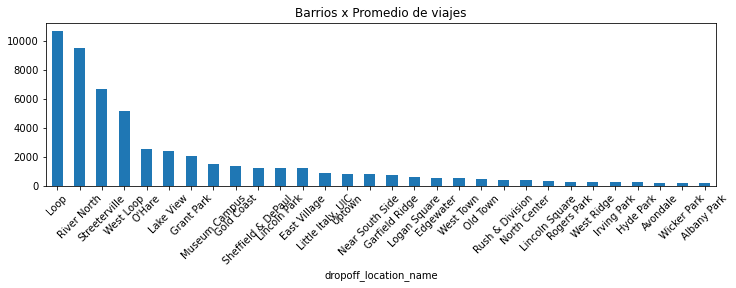

In [114]:
# Gráfico de Barrios x Promedio de viajes
location_top10.plot(
    kind='bar',
    x='dropoff_location_name',
    rot=45, 
    figsize=(12,3),
    legend = False,
    title='Barrios x Promedio de viajes')
plt.show()

In [115]:
# Lista de top 10 Barrios
location_top_10_list = location_top10.dropoff_location_name.head(10).to_list()
print("Los 10 Barrios con más viajes de destino son:")
for i, barrio in enumerate(location_top_10_list, start=1):
    print(f"{i}. {barrio}")

Los 10 Barrios con más viajes de destino son:
1. Loop
2. River North
3. Streeterville
4. West Loop
5. O'Hare
6. Lake View
7. Grant Park
8. Museum Campus
9. Gold Coast
10. Sheffield & DePaul


De los 10 barrios con más viajes de destino, podemos destacar los 4 primeros:
- Loop
- River North
- Streeterville
- West Loop

Que son los barrios en que se nota que hay un considerable volumen de viajes destino.

In [116]:
# Compañías con más viajes
company_grouped = company_trips.groupby('company_name')['trips_amount'].sum().reset_index()
company_top10 = company_grouped.sort_values(by='trips_amount', ascending=False).head(30)
company_top10.head(10)

,company_name,trips_amount
45,Flash Cab,19558
61,Taxi Affiliation Services,11422
50,Medallion Leasin,10367
63,Yellow Cab,9888
60,Taxi Affiliation Service Yellow,9299
36,Chicago Carriage Cab Corp,9181
43,City Service,8448
59,Sun Taxi,7701
58,Star North Management LLC,7455
33,Blue Ribbon Taxi Association Inc.,5953


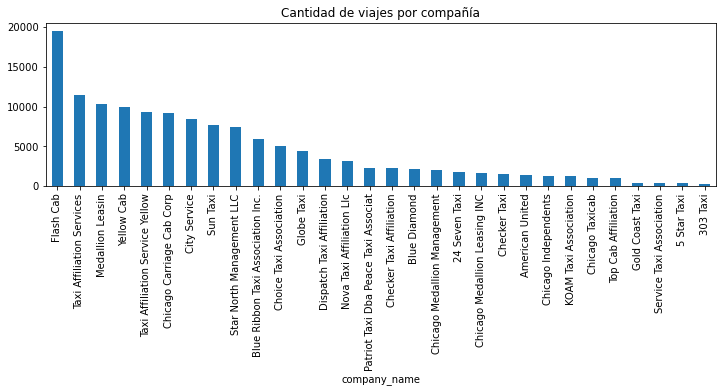

In [117]:
# Gráfico de viajes por compañía de taxis
company_top10.plot(
    kind='bar', 
    x= 'company_name', 
    figsize=(12,3),
    legend = False, 
    title = 'Cantidad de viajes por compañía'
    )
plt.show()

In [118]:
company_top10_list = company_top10.company_name.head(10).to_list()
print("Las compañías con más viajes, son:")
for i, company in enumerate(company_top10_list, start=1):
    print(f"{i}. {company}")


Las compañías con más viajes, son:
1. Flash Cab
2. Taxi Affiliation Services
3. Medallion Leasin
4. Yellow Cab
5. Taxi Affiliation Service Yellow
6. Chicago Carriage Cab Corp
7. City Service
8. Sun Taxi
9. Star North Management LLC
10. Blue Ribbon Taxi Association Inc.


Flash Cab es la compañía de Taxis que domina el mercado. Teniendo casi el doble de viajes promedio que su siguiente competidor.